In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jun  6 11:04:18 2021
@author: Jordan Swanson
Using Strava data from personal runs, exported via Golden Cheetah
"""

import pandas as pd
import matplotlib.pyplot as plt
import glob
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

              index          secs           cad            hr            km  \
count  23194.000000  23194.000000  23194.000000  23194.000000  23194.000000   
mean    1020.773821   1131.933733     81.957144    177.035828      2.926628   
std      809.572889    898.628133      8.890882     14.125982      2.240392   
min        0.000000      1.000000      0.000000     95.000000      0.000000   
25%      386.000000    408.000000     82.000000    172.000000      1.145000   
50%      806.000000    892.000000     84.000000    181.000000      2.419000   
75%     1492.000000   1714.750000     85.000000    186.000000      4.354000   
max     3649.000000   3932.000000    114.000000    201.000000     10.027000   

                kph       nm    watts           alt           lon  ...  \
count  23194.000000  23194.0  23194.0  23194.000000  23194.000000  ...   
mean      10.162340      0.0      0.0   1051.772549   -114.075869  ...   
std        2.496356      0.0      0.0      7.165730      0.019925 

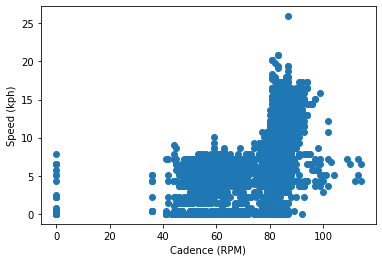

In [2]:
# Grab file list
fileList = glob.glob("*.csv")
# Stick all the dataframes together
data = pd.concat((pd.read_csv(f) for f in fileList)).reset_index()
print(data.describe())
corr = data.corr()

# plt.figure(1)
# plt.ylabel("Cadence (RPM)")
# plt.hist(data["cad"], bins=100)
# plt.figure(2)
# plt.ylabel("Heart Rate (RPM)")
# plt.boxplot(data["hr"])
# plt.figure(3)
# plt.ylabel("Speed (kph)")
# plt.boxplot(data["kph"])
plt.xlabel("Cadence (RPM)")
plt.ylabel("Speed (kph)")
plt.scatter(data["cad"],data["kph"])


y = data["kph"]
X = data[["cad", "hr", "alt"]]

In [4]:
linear_regression = LinearRegression()
linear_regression.fit(X,y)
y_pred = linear_regression.predict(X)

df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

coeff_df = pd.DataFrame(linear_regression.coef_, X.columns, columns=['Coefficient'])
coeff_df.loc["Intercept"] = linear_regression.intercept_

print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))

Mean Absolute Error: 1.1056268014360717
Mean Squared Error: 3.0718269688089896


In [5]:
display(coeff_df)

,Coefficient
cad,0.197511
hr,0.000668
alt,-0.016524
Intercept,11.235918


Looking at the results of the linear regression, i